In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [2]:
# Let's create some test data, with a few users, each running a few random jobs. 
users = ["Homer", "Bart", "Lisa", "Maggie"]
bq_info = []

project_id = "testProject"

for user in users:
    for j in range(0,1000):
        jobdata = {}
        jobdata['project_id'] = project_id
        jobdata['user_email'] = user
        jobdata['job_id'] = "job_" + str(j)
        
        #Homer works really hard. Let make his query return more bytes.
        if user == "Homer":
            bytesProcessed = random.randint(1,10) * 2000
        else:
            bytesProcessed = random.randint(1,10) * 1000
            
        jobdata['total_bytes_processed'] = bytesProcessed
        
        #We'll just pick a random hour for this job. In GCP BigQuery's information schema, you can get the hour from the start_time / end_time column.
        jobdata['hour'] = random.randint(0,23) 
        
        bq_info.append(jobdata)
        
        
df = pd.DataFrame(bq_info)
    
    
        



In [3]:
df.describe()

,total_bytes_processed,hour
count,4000.000000,4000.000000
mean,6925.750000,11.375500
std,4540.252241,6.960791
min,1000.000000,0.000000
25%,3000.000000,5.000000
50%,6000.000000,11.000000
75%,9000.000000,17.000000
max,20000.000000,23.000000


In [4]:
df.head()

,project_id,user_email,job_id,total_bytes_processed,hour
0,testProject,Homer,job_0,14000,12
1,testProject,Homer,job_1,2000,16
2,testProject,Homer,job_2,18000,13
3,testProject,Homer,job_3,10000,8
4,testProject,Homer,job_4,12000,16


In [5]:
#Let's see how many bytes each person is processing per hour by grouping by hour, and then aggregating by summing the bytes processed
df_crosstab = pd.crosstab(df["user_email"], df["hour"], values=df["total_bytes_processed"], aggfunc="sum")
df_crosstab.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_email,,,,,,,,,,,,,,,,,,,,,
Bart,300000,198000,192000,210000,178000,266000,200000,197000,185000,260000,...,316000,190000,213000,223000,183000,179000,153000,216000,234000,263000
Homer,426000,422000,524000,426000,476000,458000,506000,536000,452000,238000,...,558000,318000,426000,468000,500000,444000,458000,622000,474000,534000
Lisa,206000,211000,271000,247000,297000,224000,220000,213000,225000,235000,...,273000,189000,191000,269000,282000,185000,207000,225000,274000,250000
Maggie,262000,258000,221000,276000,304000,235000,214000,247000,235000,221000,...,219000,193000,236000,248000,238000,245000,203000,226000,177000,220000


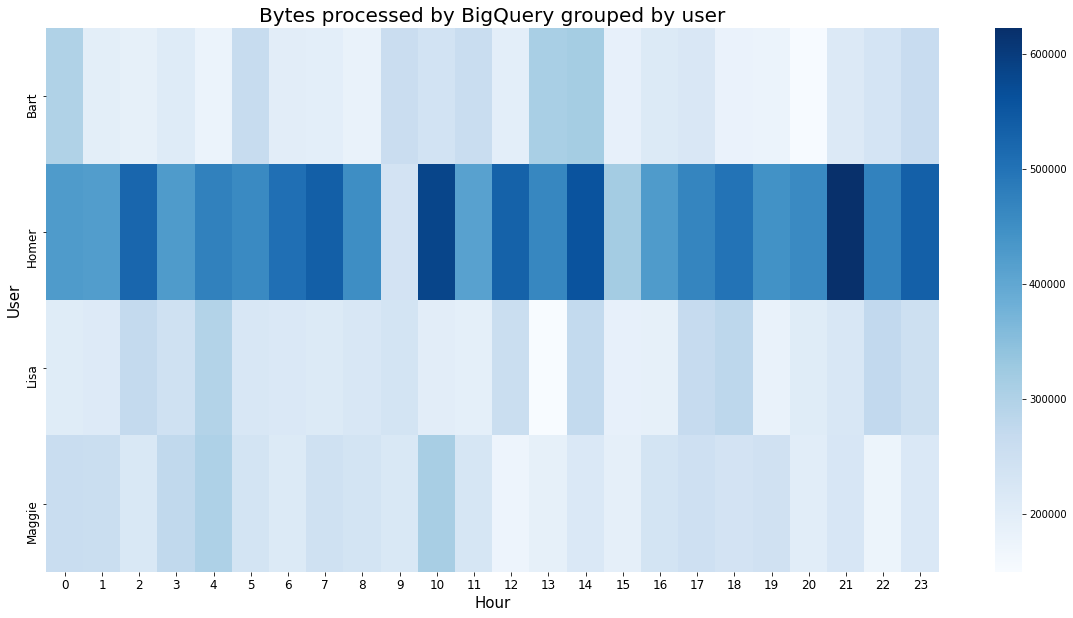

In [6]:
fig = plt.figure(figsize=(20,10))
plt.title("Bytes processed by BigQuery grouped by user", fontsize=20)
sns.heatmap(df_crosstab, cmap="Blues")
plt.xlabel("Hour", fontsize = 15) 
plt.ylabel("User", fontsize = 15) 
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12)
print()
plt.show()